<a href="https://colab.research.google.com/github/cheonhae/ezen1/blob/main/AEcase1_subway_passenger_%ED%95%98%EB%8A%98%EC%8C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [9]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 17
nanum_font number: 0


In [10]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [11]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [12]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'


## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [1]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 


In [2]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [3]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

NanumGothic


# **지하철 탑승객 분석**
- 파일 읽기
- 데이터 보이기
- 노선별 집계 및 그래프
- 사용일자 별 집계 및 그래프

## 1.주요 라이브러리 읽어들이기

In [5]:
# 데이터 분석을 위해 필요한 프로그램이 정의된 라이브러리 모듈을 읽어들입니다. 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2.파일 읽고 데이터 보이기

In [6]:
# 데이터를 읽어 들여서 출력해 봅니다.
url = 'https://github.com/cheonhae/ezen1/blob/main/CARD_SUBWAY_MONTH_202108.csv?raw=true'
subway = pd.read_csv('https://github.com/cheonhae/ezen1/blob/main/CARD_SUBWAY_MONTH_202108.csv?raw=true',
                     engine = "python", index_col = False,
                    parse_dates=['사용일자', '등록일자'])
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2021-08-01,중앙선,회기,10269,10305,2021-08-04
1,2021-08-01,일산선,마두,2306,2354,2021-08-04
2,2021-08-01,일산선,정발산,3334,3307,2021-08-04
3,2021-08-01,일산선,주엽,3047,3044,2021-08-04
4,2021-08-01,일산선,대화,4520,4151,2021-08-04
...,...,...,...,...,...,...
18633,2021-08-31,5호선,개화산,4889,4725,2021-09-03
18634,2021-08-31,과천선,선바위,7498,6443,2021-09-03
18635,2021-08-31,1호선,서울역,35669,33406,2021-09-03
18636,2021-08-31,1호선,동묘앞,5809,6035,2021-09-03


## 3.노선별 집계 및 그래프

In [7]:
# 노선별 집계하고 그래프를 그려봅니다. 
line_sum = subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['노선명'], aggfunc='sum')
line_sum

,승차총승객수,하차총승객수
노선명,,
1호선,4930790,4809891
2호선,29827011,30050336
3호선,11399211,11346523
4호선,10701190,10764499
5호선,14125719,14070037
6호선,7320539,7213500
7호선,15582172,15384310
8호선,4158786,4202589
9호선,6066566,6159524


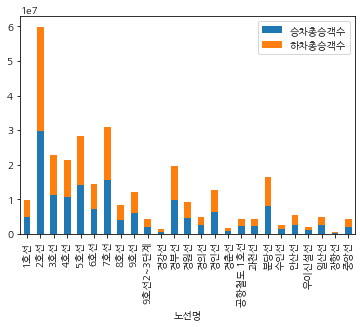

In [8]:
subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['노선명'], aggfunc='sum').plot(kind = 'bar', stacked = True);

## 4.사용일자별 집계 및 그래프

In [9]:
# 사용일자별 탑승자수 집계 및 그래프 
day_sum = subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['사용일자'], aggfunc='sum')
day_sum


,승차총승객수,하차총승객수
사용일자,,
2021-08-01,2406209,2394034
2021-08-02,5292404,5275843
2021-08-03,5380280,5362502
2021-08-04,5426098,5408459
2021-08-05,5551905,5535322
2021-08-06,5637546,5619945
2021-08-07,3637681,3620820
2021-08-08,2548465,2534415
2021-08-09,5718407,5700478


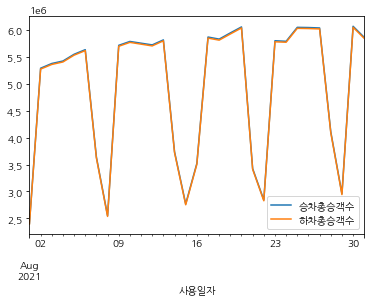

In [10]:
subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['사용일자'], aggfunc='sum').plot(kind = 'line');